In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.computational_tools import remesh, select_LatLon
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

# Read all experiments in the folder. Concatenete collections with "+" operator, which concatenate dictionary of experiments.

In [12]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')# +\
     #CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4', additional_subfolder='output')

In [14]:
ds.remesh('R64', 'R2')
ds.remesh('R64', 'R4')
ds.remesh('R64', 'R8')

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8


In [21]:
exps = ['R64_R4', 'R64_R4', 'R64_R8', 'R64']
len(ds.exps)

9

# Precompute statistics, which are cached in netcdf files

# Manually delete all cache files and compute them again

In [586]:
%%time
ds.compute_statistics(recompute=True)

Removing cache file /home/pp2681/ocean-tools/cache/KE_spectrum_R16.nc
Calculating value of KE_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_R16.nc
Calculating value of KE_spectrum_global
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_global_R16.nc
Removing cache file /home/pp2681/ocean-tools/cache/KE_R16.nc
Calculating value of KE
Saving result to /home/pp2681/ocean-tools/cache/KE_R16.nc
Removing cache file /home/pp2681/ocean-tools/cache/KE_spectrum_R2.nc
Calculating value of KE_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_R2.nc
Calculating value of KE_spectrum_global
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_global_R2.nc
Removing cache file /home/pp2681/ocean-tools/cache/KE_R2.nc
Calculating value of KE
Saving result to /home/pp2681/ocean-tools/cache/KE_R2.nc
Calculating value of KE_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_spectrum_R32.nc
Calculating value of KE_spectrum_global
Saving resu

# Check that all cache files exist

In [569]:
%%time
ds.compute_statistics(recompute=False)

Reading file /home/pp2681/ocean-tools/cache/KE_R16.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R16.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R16.nc
Returning cached value of KE_spectrum_global
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R16.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_mean_R16.nc
Returning cached value of KE_spectrum_global_mean
Calculating value of KE_time_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_time_spectrum_R16.nc
Calculating value of ssh_mean
Saving result to /home/pp2681/ocean-tools/cache/ssh_mean_R16.nc
Calculating value of ssh_var
Saving result to /home/pp2681/ocean-tools/cache/ssh_var_R16.nc
Calculating value of u_mean
Saving result to /home/pp2681/ocean-tools/cache/u_mean_R16.nc
Calculating value of v_mean
Saving result to /home/pp2681/ocean-tools/cache/v_m

Saving result to /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64_R4.nc
Reading file /home/pp2681/ocean-tools/cache/ssh_mean_R64_R4.nc
Returning cached value of ssh_mean
Reading file /home/pp2681/ocean-tools/cache/ssh_var_R64_R4.nc
Returning cached value of ssh_var
Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R64_R4.nc
Returning cached value of v_mean
Reading file /home/pp2681/ocean-tools/cache/KE_series_R64_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R8.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_R64_R8.nc
Returning cached value of KE_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R64_R8.nc
Returning cached value of KE_spectrum_global
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R64_R8.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp

# Access to cached on disk properties

In [590]:
%time ds['R64'].KE_spectrum_global

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_R64.nc
Returning cached value of KE_spectrum_global
CPU times: user 2.59 ms, sys: 1.5 ms, total: 4.09 ms
Wall time: 3.77 ms


<xarray.DataArray 'KE_spectrum_global' (Time: 243, zl: 2, freq_r: 387)>
dask.array<open_dataset-3341842104a5f2ccd21372e7bd6e8cbaKE_spectrum_global, shape=(243, 2, 387), dtype=float64, chunksize=(1, 1, 387), chunktype=numpy.ndarray>
Coordinates:
  * freq_r   (freq_r) float64 3.328e-06 7.671e-06 ... 0.001795 0.001799
  * Time     (Time) float64 30.0 60.0 90.0 120.0 ... 7.23e+03 7.26e+03 7.29e+03
  * zl       (zl) float64 1.035e+03 1.036e+03

# Basic snapshots plotting

CPU times: user 749 ms, sys: 147 ms, total: 897 ms
Wall time: 874 ms


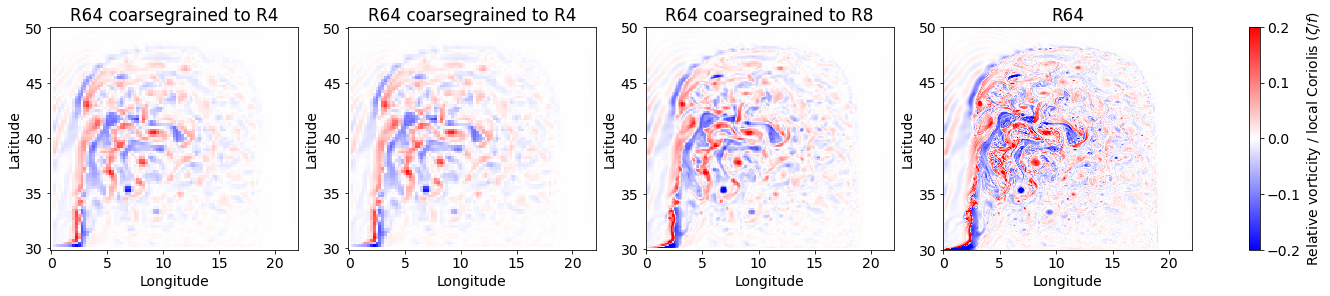

In [23]:
%%time
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_RV(exps,ax=ax);

CPU times: user 567 ms, sys: 95.7 ms, total: 663 ms
Wall time: 718 ms


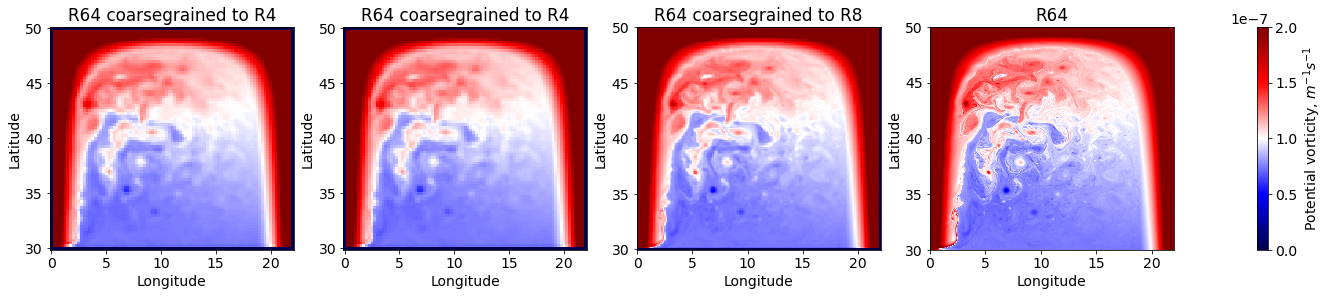

In [24]:
%%time
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_PV(exps,ax=ax);

Reading file /home/pp2681/ocean-tools/cache/KE_R64_R4.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R4.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R8.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_R64.nc
Returning cached value of KE
CPU times: user 277 ms, sys: 23.1 ms, total: 300 ms
Wall time: 537 ms


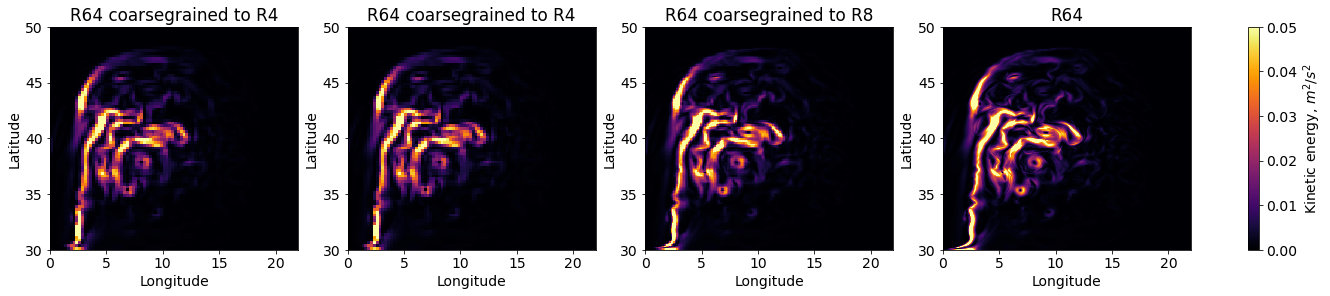

In [30]:
%%time
fig, ax = ds.get_axes(nfig=4,ncol=4)
ds.plot_KE(exps,ax=ax);

# Building of movies

In [99]:
%%time
animate_function = ds.animate(ds.plot_PV, nfig=4, ncol=4, videoname='PV.mp4')
animate_function(exps);

CPU times: user 23.6 s, sys: 308 ms, total: 23.9 s
Wall time: 24.3 s


'PV.mp4'

In [100]:
%%time
animate_function = ds.animate(ds.plot_KE, nfig=4, ncol=4, videoname='KE.mp4')
animate_function(exps);

CPU times: user 30.3 s, sys: 609 ms, total: 30.9 s
Wall time: 29.1 s


'KE.mp4'

# Build custom figure layout with "get_axes"

Reading file /home/pp2681/ocean-tools/cache/KE_R64_R4.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R4.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/KE_R64_R8.nc
Returning cached value of KE
CPU times: user 413 ms, sys: 39.4 ms, total: 452 ms
Wall time: 644 ms


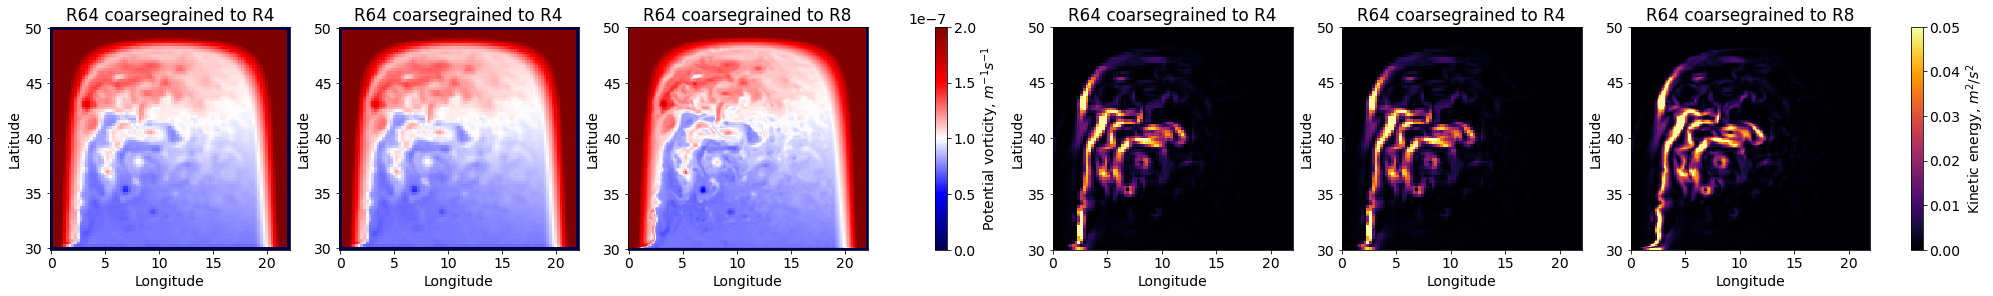

In [584]:
%%time
fig, ax = ds.get_axes(nfig=6, ncol=6)
ds.plot_PV(exps[0:3], ax=ax[:3]);
ds.plot_KE(exps[0:3], ax=ax[3:]);

# Statistical tools. Spectral analysis

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R2.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R4.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R8.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R16.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R32.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R64.nc
Returning cached value of KE_spectrum_mean


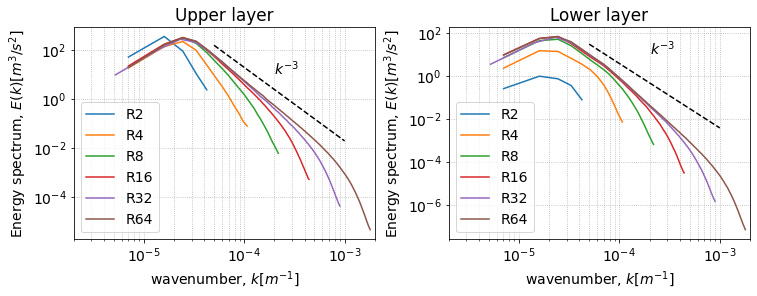

In [583]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='KE_spectrum_mean', ax=ax);

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_mean_R2.nc
Returning cached value of KE_spectrum_global_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_mean_R4.nc
Returning cached value of KE_spectrum_global_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_mean_R8.nc
Returning cached value of KE_spectrum_global_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_mean_R16.nc
Returning cached value of KE_spectrum_global_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_mean_R32.nc
Returning cached value of KE_spectrum_global_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_global_mean_R64.nc
Returning cached value of KE_spectrum_global_mean


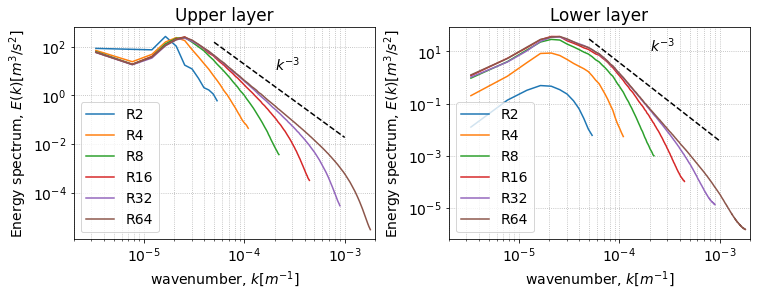

In [582]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_spectrum(['R2', 'R4', 'R8', 'R16', 'R32', 'R64'],key='KE_spectrum_global_mean', ax=ax);

Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R64_R2.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R64_R4.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R64_R8.nc
Returning cached value of KE_spectrum_mean
Reading file /home/pp2681/ocean-tools/cache/KE_spectrum_mean_R64.nc
Returning cached value of KE_spectrum_mean


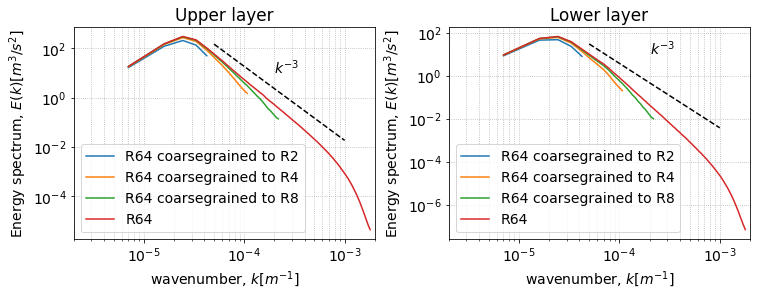

In [581]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_spectrum(['R64_R2', 'R64_R4', 'R64_R8', 'R64'],key='KE_spectrum_mean', ax=ax);

# Spectral time analysis

Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R4.nc
Returning cached value of KE_time_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R8.nc
Returning cached value of KE_time_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64.nc
Returning cached value of KE_time_spectrum


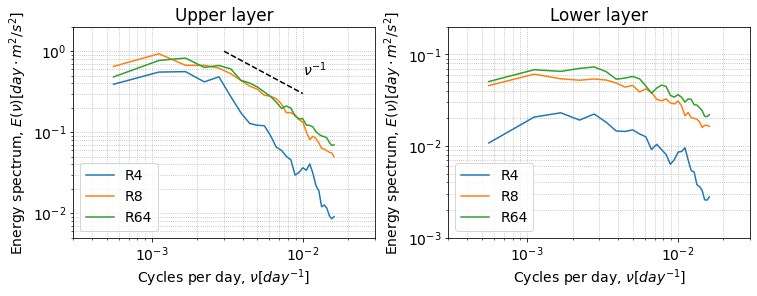

In [38]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_time_spectrum(['R4', 'R8', 'R64'], ax=ax);

Calculating value of KE_time_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_time_spectrum_R4.nc
Calculating value of KE_time_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_time_spectrum_R8.nc
Calculating value of KE_time_spectrum
Saving result to /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64.nc


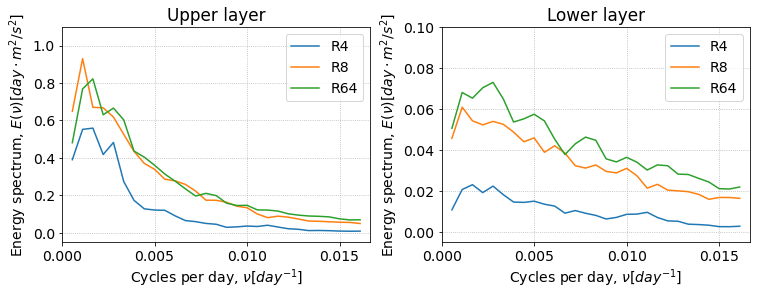

In [37]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3, size=4)
ds.plot_KE_time_spectrum(['R4', 'R8', 'R64'], ax=ax, log=False);

Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64_R4.nc
Returning cached value of KE_time_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64_R8.nc
Returning cached value of KE_time_spectrum
Reading file /home/pp2681/ocean-tools/cache/KE_time_spectrum_R64.nc
Returning cached value of KE_time_spectrum


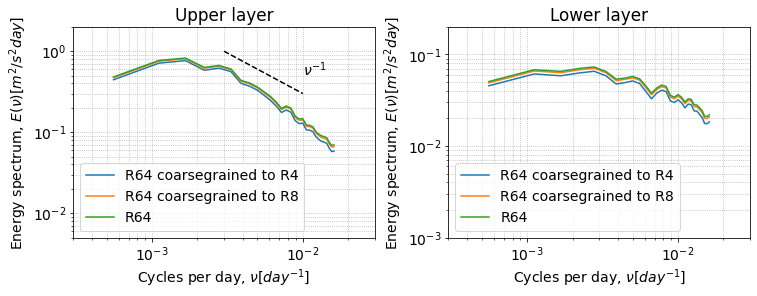

In [578]:
fig, ax = ds.get_axes(nfig=2,ncol=2,ratio=1.3)
ds.plot_KE_time_spectrum(['R64_R4', 'R64_R8', 'R64'], ax=ax);

# Simple diagnostics

Reading file /home/pp2681/ocean-tools/cache/ssh_mean_R64_R4.nc
Returning cached value of ssh_mean
Reading file /home/pp2681/ocean-tools/cache/ssh_var_R64_R4.nc
Returning cached value of ssh_var


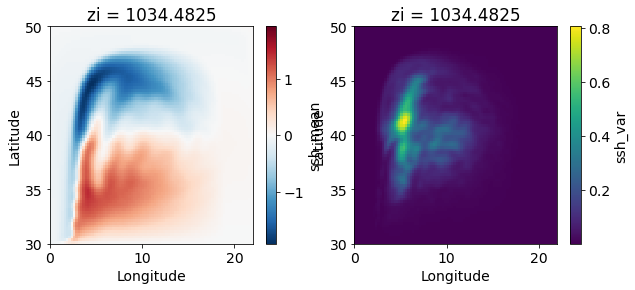

In [577]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ds['R64_R4'].ssh_mean.plot(ax=ax[0])
ds['R64_R4'].ssh_var.plot(ax=ax[1])

Reading file /home/pp2681/ocean-tools/cache/ssh_mean_R4.nc
Returning cached value of ssh_mean
Reading file /home/pp2681/ocean-tools/cache/ssh_var_R4.nc
Returning cached value of ssh_var


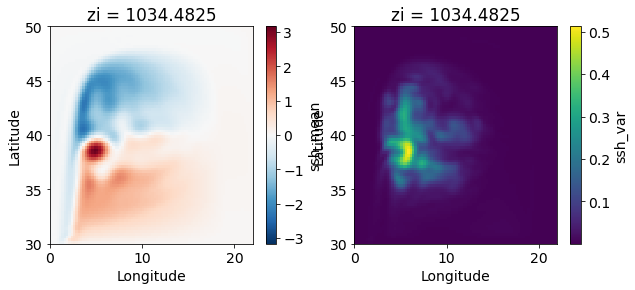

In [576]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ds['R4'].ssh_mean.plot(ax=ax[0])
ds['R4'].ssh_var.plot(ax=ax[1])

Reading file /home/pp2681/ocean-tools/cache/u_mean_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R4.nc
Returning cached value of v_mean


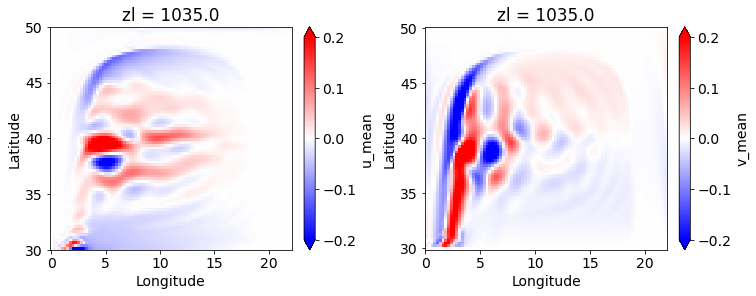

In [575]:
fig, ax = ds.get_axes(nfig=2,ncol=2, ratio=1.3)
ds['R4'].u_mean.isel(zl=0).plot(ax=ax[0],vmin=-0.2, vmax=0.2, cmap='bwr')
ds['R4'].v_mean.isel(zl=0).plot(ax=ax[1],vmin=-0.2, vmax=0.2, cmap='bwr')

Reading file /home/pp2681/ocean-tools/cache/u_mean_R64_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R64_R4.nc
Returning cached value of v_mean


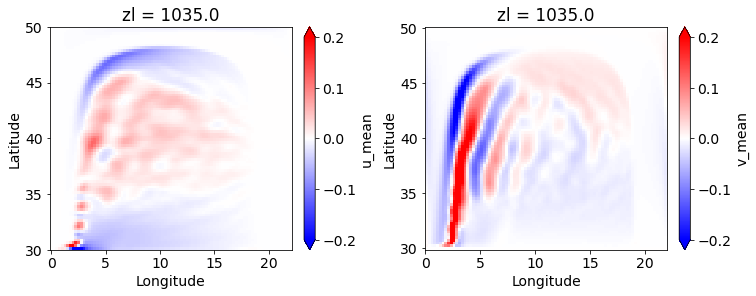

In [574]:
fig, ax = ds.get_axes(nfig=2,ncol=2, ratio=1.3)
ds['R64_R4'].u_mean.isel(zl=0).plot(ax=ax[0],vmin=-0.2, vmax=0.2, cmap='bwr')
ds['R64_R4'].v_mean.isel(zl=0).plot(ax=ax[1],vmin=-0.2, vmax=0.2, cmap='bwr')

Calculating value of KE_series
Saving result to /home/pp2681/ocean-tools/cache/KE_series_R64.nc
Calculating value of KE_series
Saving result to /home/pp2681/ocean-tools/cache/KE_series_R64_R4.nc
Calculating value of KE_series
Saving result to /home/pp2681/ocean-tools/cache/KE_series_R4.nc
Reading file /home/pp2681/ocean-tools/cache/KE_series_R64.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_series_R64_R4.nc
Returning cached value of KE_series
Reading file /home/pp2681/ocean-tools/cache/KE_series_R4.nc
Returning cached value of KE_series


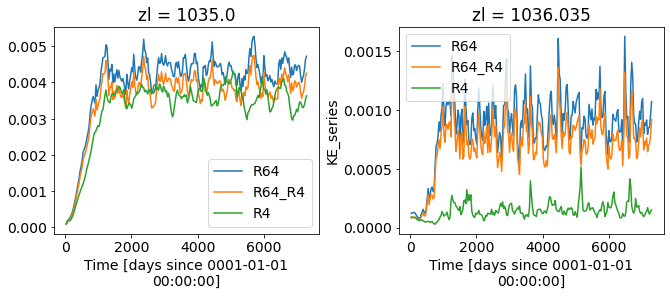

In [703]:
fig, ax = ds.get_axes(nfig=2,ncol=2)
ds['R64'].KE_series.isel(zl=0).plot(ax=ax[0], label='R64')
ds['R64_R4'].KE_series.isel(zl=0).plot(ax=ax[0], label='R64_R4')
ds['R4'].KE_series.isel(zl=0).plot(ax=ax[0], label='R4')
ax[0].legend()
ds['R64'].KE_series.isel(zl=1).plot(ax=ax[1], label='R64')
ds['R64_R4'].KE_series.isel(zl=1).plot(ax=ax[1], label='R64_R4')
ds['R4'].KE_series.isel(zl=1).plot(ax=ax[1], label='R4')
ax[1].legend()

# Mean kineric energy (MKE), Eddy kinetic energy (EKE) and total

Reading file /home/pp2681/ocean-tools/cache/MKE_R64_R4.nc
Returning cached value of MKE
Reading file /home/pp2681/ocean-tools/cache/EKE_R64_R4.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/KE_mean_R64_R4.nc
Returning cached value of KE_mean


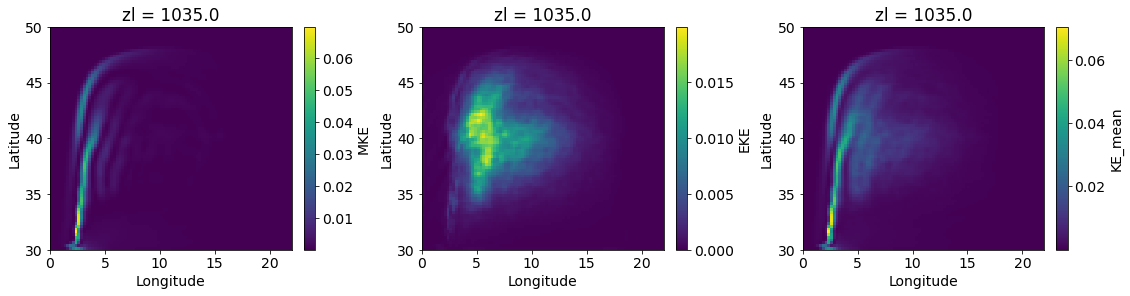

In [737]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R64_R4'].MKE.isel(zl=0).plot(ax=ax[0])
ds['R64_R4'].EKE.isel(zl=0).plot(ax=ax[1])
ds['R64_R4'].KE_mean.isel(zl=0).plot(ax=ax[2])

Reading file /home/pp2681/ocean-tools/cache/MKE_R64_R4.nc
Returning cached value of MKE
Reading file /home/pp2681/ocean-tools/cache/EKE_R64_R4.nc
Returning cached value of EKE
Reading file /home/pp2681/ocean-tools/cache/KE_mean_R64_R4.nc
Returning cached value of KE_mean


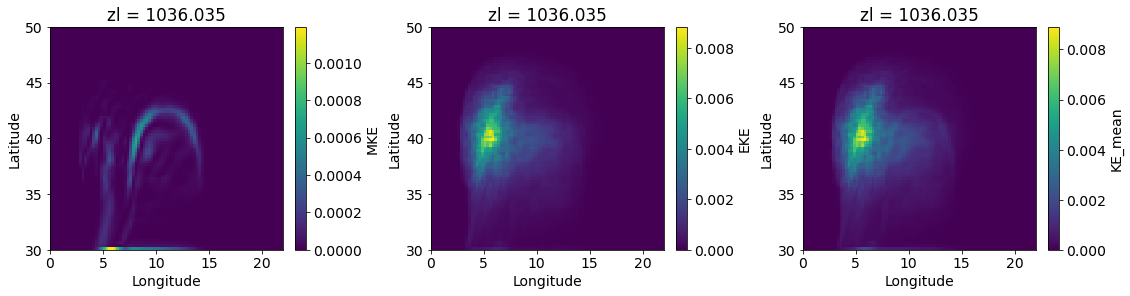

In [738]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
ds['R64_R4'].MKE.isel(zl=1).plot(ax=ax[0])
ds['R64_R4'].EKE.isel(zl=1).plot(ax=ax[1])
ds['R64_R4'].KE_mean.isel(zl=1).plot(ax=ax[2])

# Difference between old and new definition of EKE

Reading file /home/pp2681/ocean-tools/cache/u_mean_R8.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R8.nc
Returning cached value of v_mean
Reading file /home/pp2681/ocean-tools/cache/u_mean_R8.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R8.nc
Returning cached value of v_mean
0.047538117


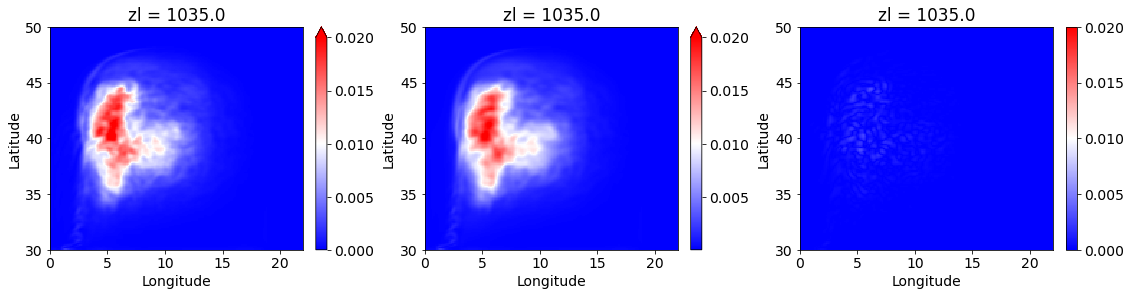

In [734]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
eke1 = ds['R8'].EKE.isel(zl=0)
eke2 = ds['R8'].EKE_old.isel(zl=0)
eke1.plot(ax=ax[0], vmax=0.02, cmap='bwr')
eke2.plot(ax=ax[1], vmax=0.02, cmap='bwr')
error = np.abs(eke1-eke2)
error.plot(ax=ax[2], vmax=0.02, cmap='bwr')
print((error.mean(dim=('xh', 'yh')) / eke1.mean(dim=('xh', 'yh'))).values)

Calculating value of EKE
Calculating value of KE
Saving result to /home/pp2681/ocean-tools/cache/KE_R4.nc
Calculating value of MKE
Reading file /home/pp2681/ocean-tools/cache/u_mean_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R4.nc
Returning cached value of v_mean
Reading file /home/pp2681/ocean-tools/cache/u_mean_R4.nc
Returning cached value of u_mean
Reading file /home/pp2681/ocean-tools/cache/v_mean_R4.nc
Returning cached value of v_mean
Saving result to /home/pp2681/ocean-tools/cache/MKE_R4.nc
Reading file /home/pp2681/ocean-tools/cache/KE_R4.nc
Returning cached value of KE
Reading file /home/pp2681/ocean-tools/cache/MKE_R4.nc
Returning cached value of MKE
Saving result to /home/pp2681/ocean-tools/cache/EKE_R4.nc
Reading file /home/pp2681/ocean-tools/cache/MKE_R4.nc
Returning cached value of MKE
0.020803427


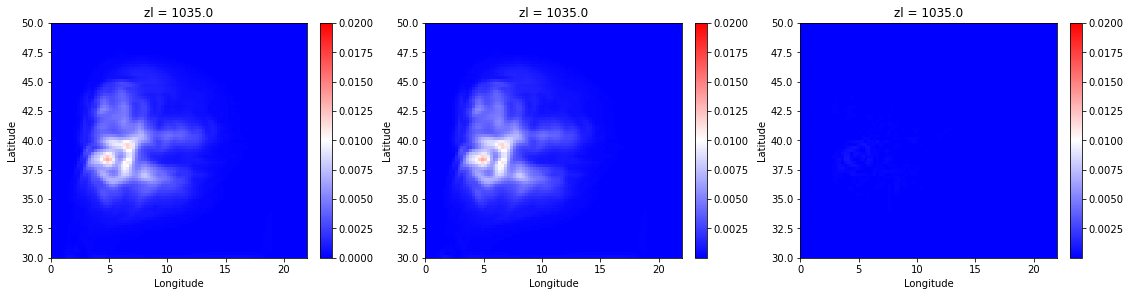

In [12]:
fig, ax = ds.get_axes(nfig=3,ncol=3, ratio=1.3)
eke1 = ds['R4'].EKE.isel(zl=0)
eke2 = ds['R4'].EKE_old.isel(zl=0)
eke1.plot(ax=ax[0], vmax=0.02, cmap='bwr')
eke2.plot(ax=ax[1], vmax=0.02, cmap='bwr')
error = np.abs(eke1-eke2)
error.plot(ax=ax[2], vmax=0.02, cmap='bwr')
print((error.mean(dim=('xh', 'yh')) / eke1.mean(dim=('xh', 'yh'))).values)